In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/logs/20250505_155033_TransformerClassifier.csv')
df = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/modelling/logs/20250505_211114_TransformerClassifier.csv')

<Axes: xlabel='epoch', ylabel='avg_val_loss'>

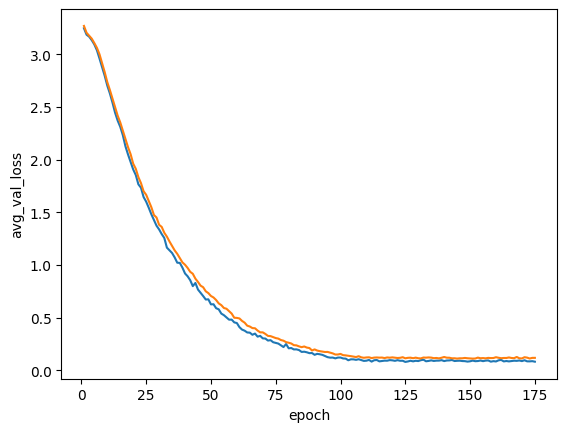

In [4]:
sns.lineplot(y='avg_val_loss', x='epoch', data=df)
sns.lineplot(y='avg_train_loss', x='epoch', data=df)

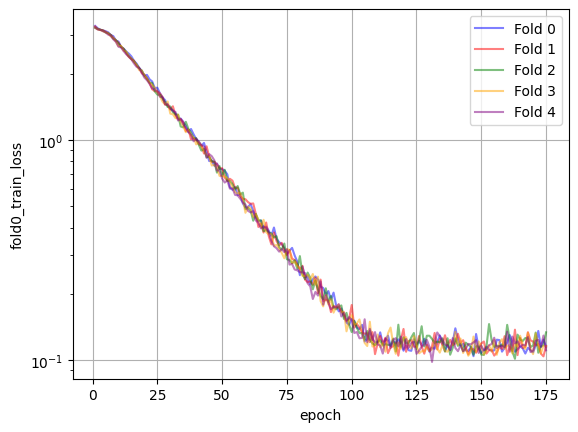

In [5]:
sns.lineplot(y='fold0_train_loss', x='epoch', data=df, color='blue', alpha=0.5, label='Fold 0')
sns.lineplot(y='fold1_train_loss', x='epoch', data=df, color='red', alpha=0.5, label='Fold 1')
sns.lineplot(y='fold2_train_loss', x='epoch', data=df, color='green', alpha=0.5, label='Fold 2')
sns.lineplot(y='fold3_train_loss', x='epoch', data=df, color='orange', alpha=0.5, label='Fold 3')
sns.lineplot(y='fold4_train_loss', x='epoch', data=df, color='purple', alpha=0.5, label='Fold 4')
plt.yscale('log')
plt.grid(True)
plt.legend()

<Axes: xlabel='epoch', ylabel='fold0_val_loss'>

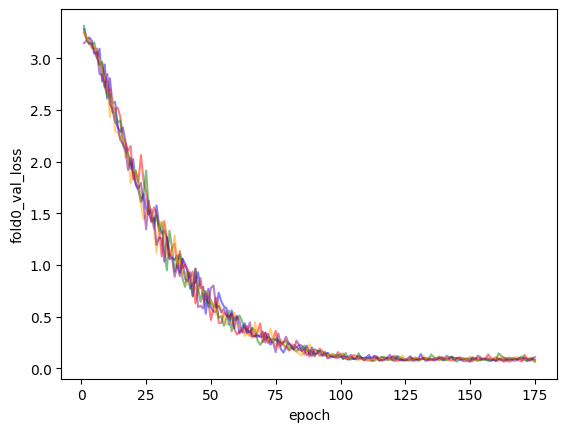

In [6]:
sns.lineplot(y='fold0_val_loss', x='epoch', data=df, color='blue', alpha=0.5)
sns.lineplot(y='fold1_val_loss', x='epoch', data=df, color='red', alpha=0.5)
sns.lineplot(y='fold2_val_loss', x='epoch', data=df, color='green', alpha=0.5)
sns.lineplot(y='fold3_val_loss', x='epoch', data=df, color='orange', alpha=0.5)
sns.lineplot(y='fold4_val_loss', x='epoch', data=df, color='purple', alpha=0.5)


In [7]:
import sys
sys.path.append('..')
from dataset.frame_sampling import multiple_sampling_without_replacement_uniform

In [8]:
meta = pd.read_csv('/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/data/preprocessed/video_metadata_v4.csv')

In [9]:
meta.head()

,filename,label,data_source,original_fps,original_width,original_height,original_frame_count,original_duration_sec,start_frame,end_frame,processed_frame_count,processed_duration_sec,preprocess_version,horizontal_offset,vertical_offset,x_scale,y_scale,landmarks_metadata_file,landmarks_preprocess_version
0,ajudar_ne_1.mp4,ajudar,ne,12.00000,240,176,44,3.666667,7,36,30,2.500000,v4,0.009,-0.038,1.050306,0.939283,ajudar_ne_1.json,v4
1,ajudar_sb_2.mp4,ajudar,sb,29.97003,1280,720,79,2.635967,6,66,61,2.035367,v4,-0.003,-0.014,1.794824,1.268328,ajudar_sb_2.json,v4
2,ajudar_uf_3.mp4,ajudar,uf,29.97003,480,270,115,3.837167,24,89,66,2.202200,v4,0.006,-0.068,1.710732,1.237105,ajudar_uf_3.json,v4
3,ajudar_vl_4.mp4,ajudar,vl,29.97003,1920,1080,141,4.704700,11,126,116,3.870533,v4,-0.000,0.042,1.664963,1.145026,ajudar_vl_4.json,v4
4,ajudar_vl_5.mp4,ajudar,vl,29.97000,1920,1080,108,3.603604,0,106,107,3.570237,v4,0.022,-0.045,1.437496,1.114402,ajudar_vl_5.json,v4


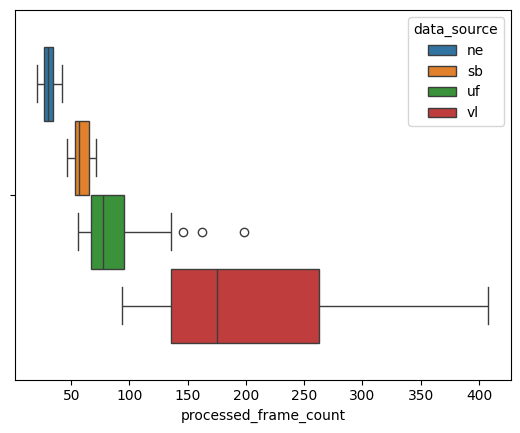

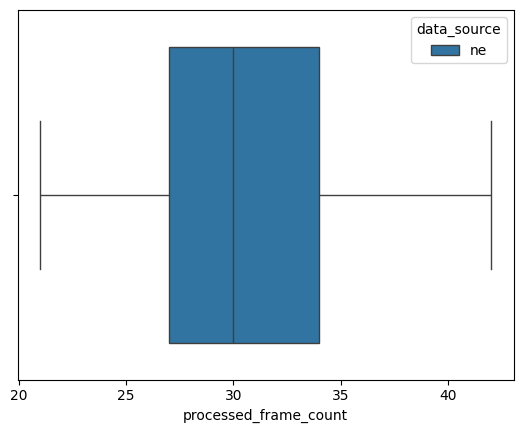

,filename,label,data_source,original_fps,original_width,original_height,original_frame_count,original_duration_sec,start_frame,end_frame,processed_frame_count,processed_duration_sec,preprocess_version,horizontal_offset,vertical_offset,x_scale,y_scale,landmarks_metadata_file,landmarks_preprocess_version
78,cortar_ne_1.mp4,cortar,ne,12.0,240,176,42,3.500000,14,34,21,1.750000,v4,0.013,-0.088,0.984497,0.899399,cortar_ne_1.json,v4
96,filho_ne_1.mp4,filho,ne,12.0,240,176,33,2.750000,5,27,23,1.916667,v4,-0.002,-0.121,0.864973,0.790647,filho_ne_1.json,v4
144,vagina_ne_1.mp4,vagina,ne,12.0,240,176,29,2.416667,3,28,26,2.166667,v4,-0.006,-0.194,0.958403,0.894504,vagina_ne_1.json,v4
84,crescer_ne_1.mp4,crescer,ne,12.0,240,176,46,3.833333,13,38,26,2.166667,v4,-0.005,-0.082,0.993437,0.908983,crescer_ne_1.json,v4
102,garganta_ne_1.mp4,garganta,ne,12.0,240,176,39,3.250000,7,32,26,2.166667,v4,-0.020,-0.121,0.923480,0.862403,garganta_ne_1.json,v4
114,jovem_ne_1.mp4,jovem,ne,12.0,240,176,33,2.750000,3,28,26,2.166667,v4,0.007,-0.091,1.015936,0.921080,jovem_ne_1.json,v4
90,família_ne_1.mp4,família,ne,12.0,240,176,39,3.250000,6,32,27,2.250000,v4,0.010,-0.122,0.874593,0.811106,família_ne_1.json,v4
120,ouvir_ne_1.mp4,ouvir,ne,12.0,240,176,36,3.000000,7,33,27,2.250000,v4,-0.013,-0.053,1.019356,0.925071,ouvir_ne_1.json,v4
108,homem_ne_1.mp4,homem,ne,12.0,240,176,41,3.416667,4,30,27,2.250000,v4,-0.006,-0.071,1.015639,0.939509,homem_ne_1.json,v4
30,banheiro_ne_1.mp4,banheiro,ne,12.0,240,176,46,3.833333,6,33,28,2.333333,v4,0.019,-0.039,1.041510,0.943184,banheiro_ne_1.json,v4


In [17]:
sns.boxplot(data = meta, x = 'processed_frame_count', hue = 'data_source')
plt.show()
sns.boxplot(data = meta[meta['data_source'] == 'ne'], x = 'processed_frame_count', hue = 'data_source')
plt.show()
meta.sort_values(by = 'processed_frame_count', ascending = True).head(10)

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
import numpy as np
from typing import Dict, Any, List

# Test different video lengths
num_frames_list = np.arange(12, 26)
rename_dict = {i+1: j for i, j in enumerate(num_frames_list)}
rename_dict[0] = 'frame_count'
rename_dict['index'] = 'filename'
n_samples = []
list_of_sample_sets = []

frame_count_to_samples = {}

for i,row in meta.sort_values(by='processed_frame_count', ascending = True).iterrows():
    fn = row['filename']
    frame_count = row['processed_frame_count']
    frame_count_to_samples[fn] = [frame_count]
    # Run tests and display results
    for num_frames in num_frames_list:
        config =    {
            'frames_per_sample': num_frames,
            'num_samples_limit': 3,
            'replacement_rate': 0.5,
            'include_remaining': True
            }

        samples = multiple_sampling_without_replacement_uniform(frame_count, config)
        n_samples.append(len(samples))
        list_of_sample_sets.append(samples)
        frame_count_to_samples[fn].append(len(samples))
        # Calculate remaining frames after main sampling
        frames_used = set()
        for sample in samples:
            frames_used.update(sample)
        remaining = num_frames - len(frames_used)
        if remaining > 0:
            print(f"sampling {num_frames} from {len(samples)} frames, {remaining} remaining")
n_samples_df = pd.DataFrame(frame_count_to_samples).T.reset_index().rename(columns = rename_dict)
inverse_n_samples_df = pd.DataFrame(frame_count_to_samples).T.rename(columns = rename_dict).drop(columns = ['frame_count']).T.reset_index()

sampling 22 from 0 frames, 22 remaining
sampling 23 from 0 frames, 23 remaining
sampling 24 from 0 frames, 24 remaining
sampling 25 from 0 frames, 25 remaining
sampling 24 from 0 frames, 24 remaining
sampling 25 from 0 frames, 25 remaining


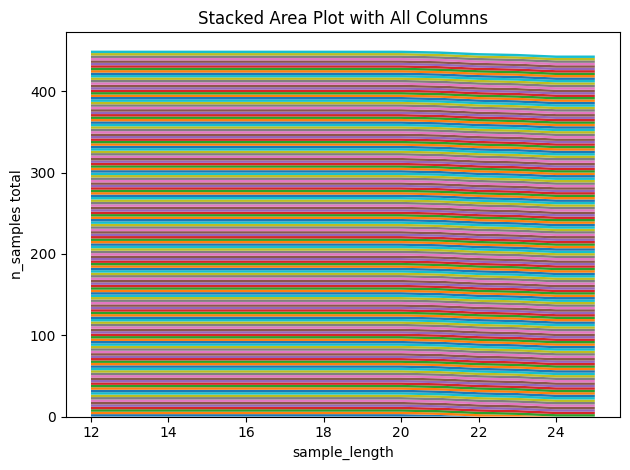

In [162]:
# Example: Load your own DataFrame with shape (n_rows, 150)
df = inverse_n_samples_df.copy()

# Assume first column is x-axis (e.g., time), and the rest are the series to stack
x = df.iloc[:, 0]
y = df.iloc[:, 1:]

# Optional: make the data cumulative over time
# y = y.cumsum(axis=0)

# Plot
plt.stackplot(x, y.T, labels=y.columns)  # Transpose y so each row is a series
plt.title("Stacked Area Plot with All Columns")
plt.xlabel("sample_length")
plt.ylabel("n_samples total")
plt.tight_layout()
plt.show()


In [151]:
n_samples_df

,filename,frame_count,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,cortar_ne_1.mp4,21,2,2,2,2,2,2,2,2,2,1,0,0,0,0
1,filho_ne_1.mp4,23,2,2,2,2,2,2,2,2,2,2,2,1,0,0
2,vagina_ne_1.mp4,26,3,2,2,2,2,2,2,2,2,2,2,2,2,2
3,crescer_ne_1.mp4,26,3,2,2,2,2,2,2,2,2,2,2,2,2,2
4,garganta_ne_1.mp4,26,3,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,bebê_vl_6.mp4,322,27,25,23,22,21,19,18,17,17,16,15,14,14,13
146,filho_vl_4.mp4,340,29,27,25,23,22,20,19,18,17,17,16,15,15,14
147,bebê_vl_5.mp4,342,29,27,25,23,22,21,19,18,18,17,16,15,15,14
148,banana_vl_6.mp4,348,29,27,25,24,22,21,20,19,18,17,16,16,15,14


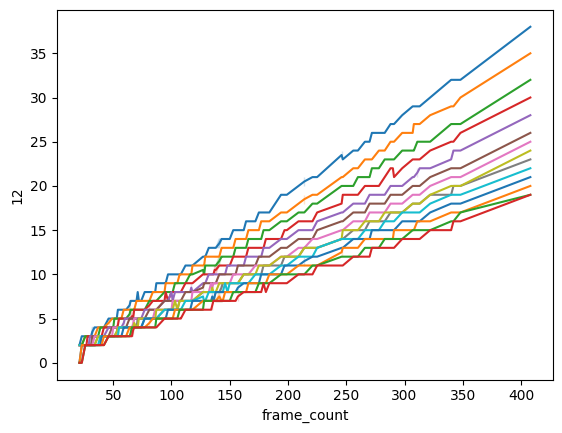

In [136]:
for y_val in range(12, 26):
    sns.lineplot(y=y_val, x='frame_count', data=n_samples_df)

<Axes: >

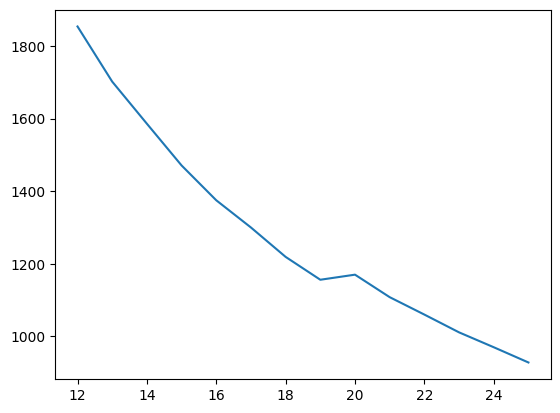

In [143]:
n_samples_df[n_samples_df.columns[2:]].sum().plot()

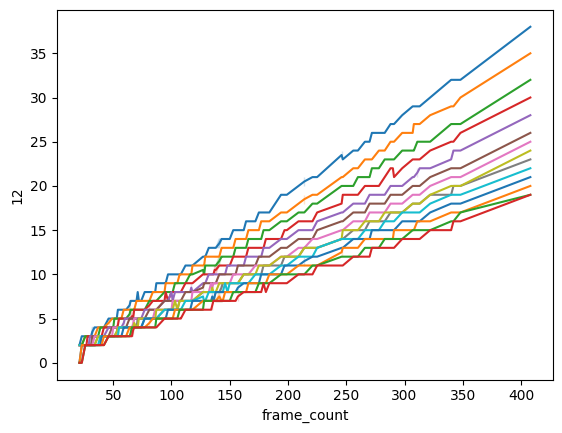

In [ ]:
for y_val in range(12, 26):
    sns.lineplot(y=y_val, x='frame_count', data=n_samples_df)